# Data preprocessing before alignment using Morpho

## Packages

In [1]:
import os
import sys
from pathlib import Path
import anndata as ad
import numpy as np

sys.path.insert(0, "/home/yao/PythonProject/Yao_packages/morpho")
import morpho

## Data source

In [2]:
os.chdir("/media/yao/Yao/Projects/Project_morpho/slices-E8-10_b")
save_image_folder = "slices_image"
Path(save_image_folder).mkdir(parents=True, exist_ok=True)

In [3]:
slice1 = ad.read_h5ad("cellbin_h5ad/E8-10_b_S11.h5ad")
slice2 = ad.read_h5ad("cellbin_h5ad/E8-10_b_S12.h5ad")

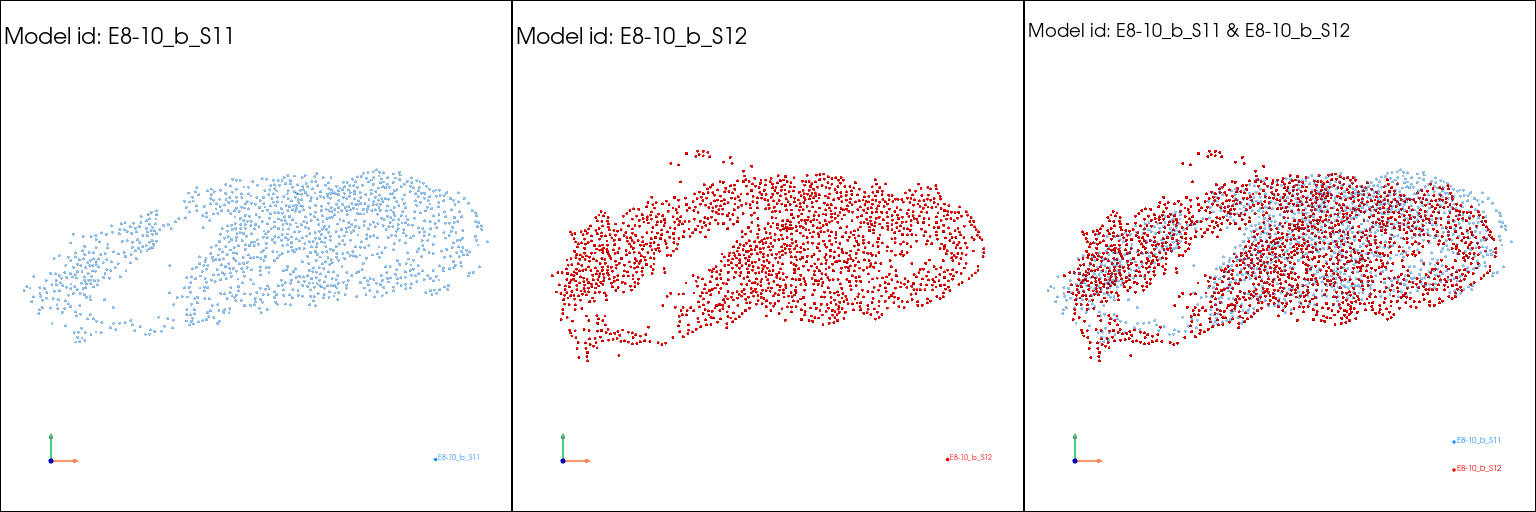

In [4]:
morpho.multi_models(
    [slice1, slice2], spatial_key="spatial", center_zero=True, id_key="slices", jupyter="static", mode="both",
    filename=os.path.join(save_image_folder, "E8-10_b_pairwise_raw_spatial_slices.pdf")
)

## Morpho preprocessing

## Calculate gene expression similarity using raw gene expression matrix

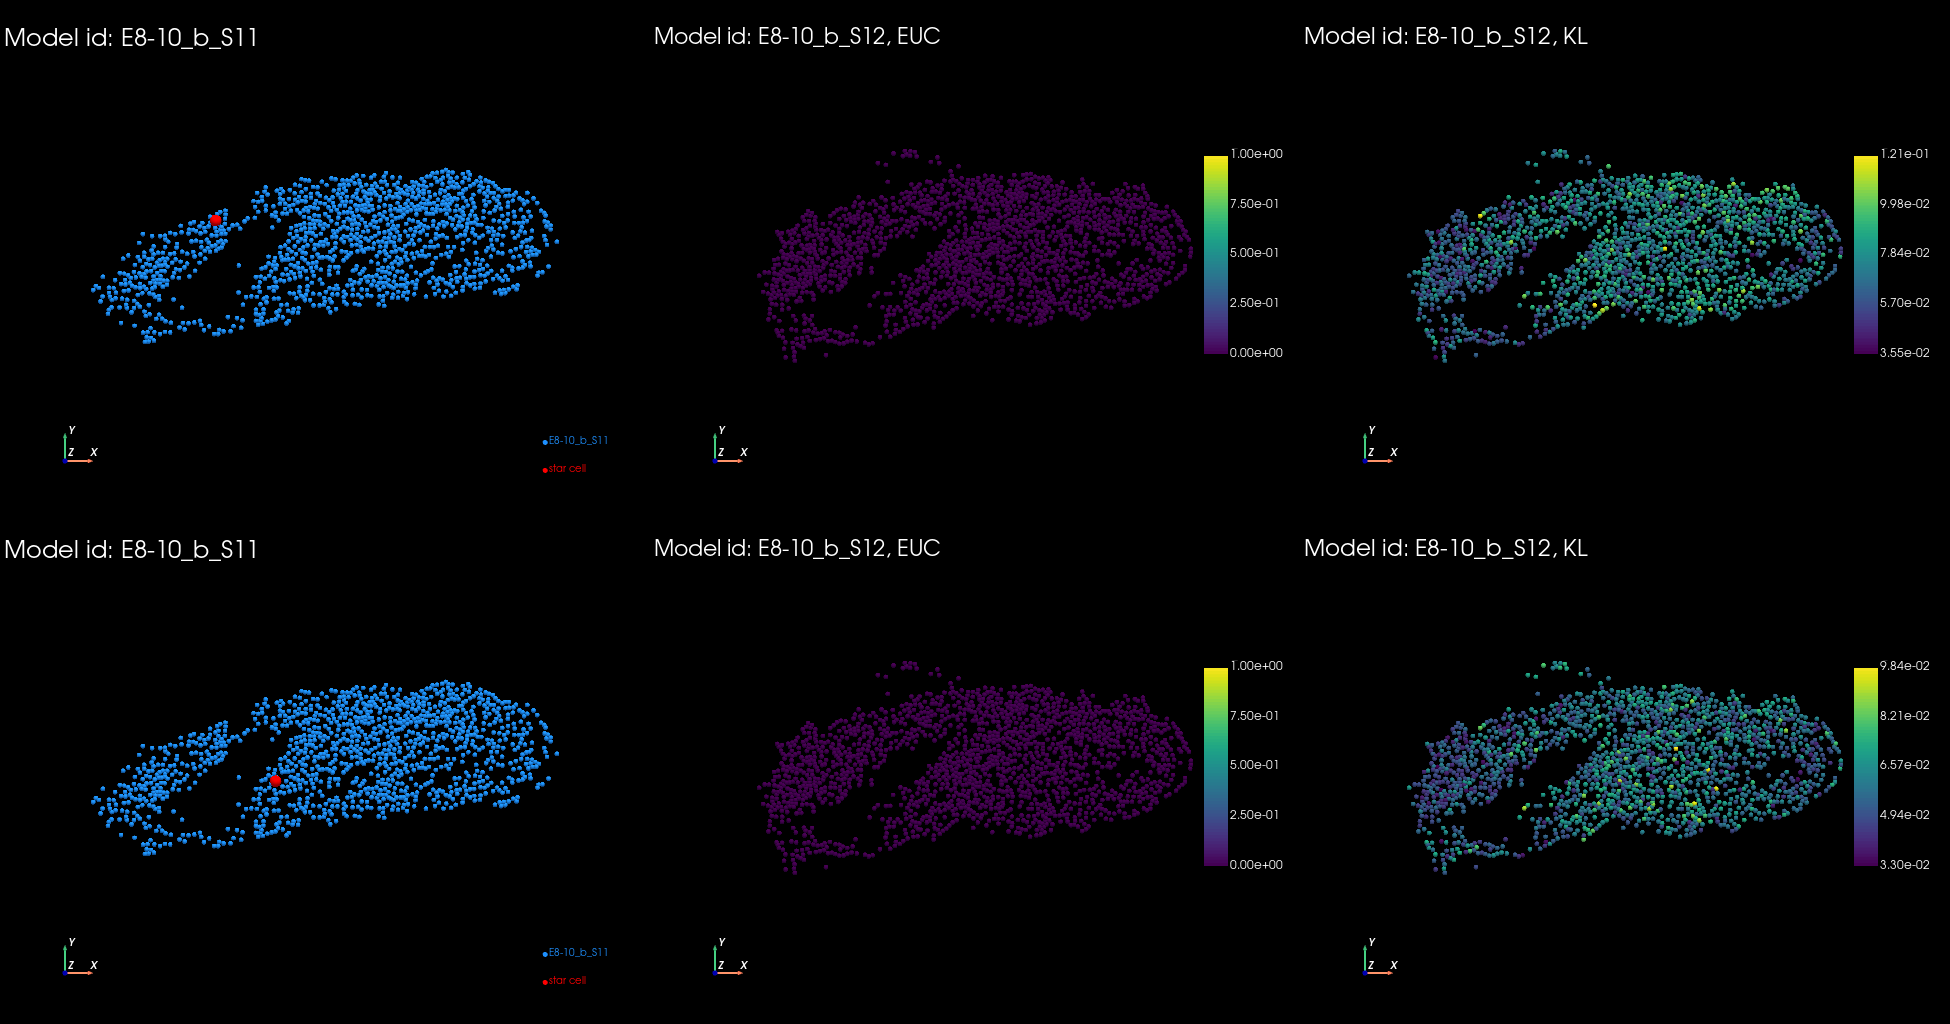

In [5]:
morpho.pairwise_exp_similarity(
    adataA=slice1,
    adataB=slice2,
    cells=[200, 300],
    filename=os.path.join(save_image_folder, "E8-10_b_pairwise_morpho_raw_geneexp_similarity.pdf"),
    jupyter="static",
    window_size = (650, 512)
)